In [111]:
#PlantifyDr Dataset
import numpy as np
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [112]:
import os
#Put your Dataset path here
doc = [doc for doc in os.listdir('/Users/ameyagarwal/Downloads/PlantDiseasesDataset/') if not doc.endswith('.DS_Store')]

In [ ]:
#The output should be of the following values 
# ['Apple',
#  'Bell pepper',
#  'Strawberry',
#  'Citrus',
#  'Potato',
#  'Cherry',
#  'Corn',
#  'Grape',
#  'Tomato',
#  'Peach']
doc

In [114]:
#Put directory of your plant here 
class_names = [doc for doc in os.listdir('C:\Users\Shipra\OneDrive\Desktop\sem 6\Mini Project Plant\Plant_Disease-main\images\Apple') if not doc.endswith('.DS_Store')]
print(class_names)

['Apple Black rot', 'Cedar apple rust', 'Apple Scab', 'Apple Healthy']


In [115]:
len(class_names)

4

In [122]:
class_names

['Apple Black rot', 'Cedar apple rust', 'Apple Scab', 'Apple Healthy']

In [117]:
datagen = ImageDataGenerator(
    validation_split = 0.2
)
# training data
train_generator = datagen.flow_from_directory( 
    directory="./newtrain", #the directory to the train folder of that plant
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
    subset="training"
)
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="./newtrain", #the directory to the val folder of that plant
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
    subset="validation"
)
# test data
test_generator = datagen.flow_from_directory( 
    directory="./newval", #the directory to the val folder of that plant
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 13124 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [118]:
mobilenet_v2 = tf.keras.applications.MobileNetV2( include_top=False, weights='imagenet',input_shape=(224,224,3))
for layer in mobilenet_v2.layers:
    layer.trainable = False

In [119]:
#Make sure number of classes that you have the same number is there as output layer number
x = mobilenet_v2.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='sigmoid')(x)
model = Model(inputs = mobilenet_v2.input, outputs = predictions)

In [120]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_9[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']     

In [121]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32#sparse
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size,verbose=1)

In [123]:
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
107/411 [======>.......................] - ETA: 2:30 - loss: 1.4724 - accuracy: 0.3180

In [93]:
model.save('modelapple-mobilenetv2-train2')

INFO:tensorflow:Assets written to: modelapple-mobilenetv2-train2/assets


INFO:tensorflow:Assets written to: modelapple-mobilenetv2-train2/assets


<h1>Loss Cruves</h1>

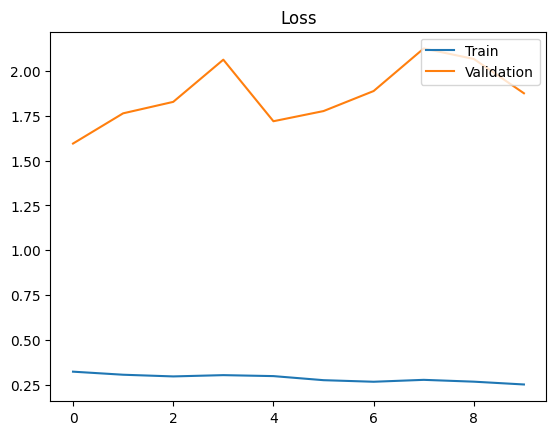

In [95]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

<h1>Accuracy Curves</h1>

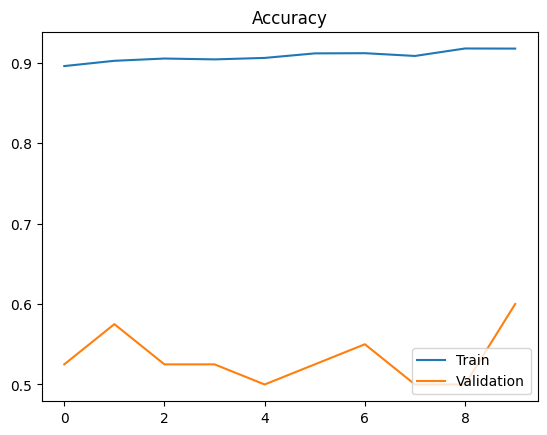

In [96]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [94]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

2/2 [==============================] - 3s 554ms/step - loss: 1.8748 - accuracy: 0.6000
The test loss is:  1.8748213052749634
The best accuracy is:  60.00000238418579


In [103]:
img = tf.keras.preprocessing.image.load_img('./newval/Apple Black rot/AppleBlackRot(1).JPG', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
#img

In [104]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 0s 236ms/step
[[0.06681541 0.08459421 0.5801255  0.26846483]]


In [105]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[2]


In [108]:
class_names

[]

In [107]:
class_names[2]

IndexError: list index out of range

In [106]:
class_names[class_id.item()]

IndexError: list index out of range

In [ ]:
model = tf.keras.models.load_model('my_model')